# das mehrschichtige Perzeptron
## 3 Layer eines künstlichen neuronalen Netzes:

![Image](data/mnist2.png)

-------
## KNN zur Erkennung der eigenen Handschrift:

![Image](data/gewichtung.png)

code-snippets zum nachkontrollieren unter https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork


In [7]:
#wir haben hier min. 3 Parameter an denen wir drehen können:

## 1. Lernrate
## 2. Anzahl der Hidden notes
## 3. Epochen (Durchläufe) in denen das neuronale Netz trainiert wird

#trainieren [n.train] heißt GEWICHTE EINSTELLEN

In [ ]:
# Bib's importieren
import numpy
import scipy.special
import matplotlib.pyplot
##damit die grafiken im notebook dargestellt werden, nicht irgendwo anders...:
%matplotlib inline
# helper to load data from PNG image files
import imageio

In [2]:
#neuronales Netz Klasse definieren
class neuralNetwork:
    
    #Initialisierung des neuronalen Netzes << init
    #initialisierungsmethode mit variablen (internen daten)
    #in der klammer befinden sich die variablen
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #Anzahl der Knoten in jedem Layer setzen
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #s.123
        # 1.1. Verknüpfungsgewichte zwischen den Layern, bzw. Knoten
        #1.1.3. Gewichtsmatrizen erzeugen deren Größe sich aus den Werten von self.inodes, self.hnodes und self.onodes ergibt
        #Gewichtsmatrizen w_Input-Hidden und w_Hidden-Output miteinander verlinken
        #d.h.
        #w_11 w_21
        #w_12 w_22
        # + Verfeinerung der Gewichtsinitialisierung << zusätzlich Wurzel aus der Anzahl der Knoten ziehen
        ## die Gewichte sind Normalverteilt (Art des Zufallsgenerators)
        ## benötigt Mittelwert (verschieben auf der X-Achse) und Standardaweichung (Breite der normalverteilung)
        ## Erfahrungswerte: wenn man viele eingabewerte hat muß man breiter streuen...
        ## 2-dimensionale Matrix von Zufallswerten
        ##Anlegen ALLER Gewichte (Zufallszahlen) zwischen input und hidden!!!
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        ##Anlegen ALLER Gewichte (Zufallszahlen) zwischen hidden und output!!!
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        #Lernrate setzen
        self.lr = learningrate

        #Mit Hilfe des lambda-Operators können anonyme Funktionen, d.h. Funktionen ohne Namen erzeugt werden.
        #lambda-Operator als Aktivierungsfunktion übernimmt x und gibt dann den sigmoid-wert von x zurück
        self.activation_function = lambda x: scipy.special.expit(x)           
                  
        pass
    
                  
#trainieren des Netzes << train
#d.h. Vergleichen der berechneten Ausgabe mit der gewünschten Ausgabe und 
#steuert anhand der ermittelten Abweichungen dann wie die Gewichte des Netzes aktualisiert werden
    
    #Teil 1, Ausgabe erzeugen (siehe query)
    def train(self, inputs_list, targets_list):
        # umwandeln der Inputs in einen 2D numpy.Array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #s.124, bzw. s.52-53
        #X_hidden = W_hidden * I
        #Berechnung der Eingangssignale in hidden_layer (siehe "Abfrage/query")
        hidden_inputs = numpy.dot(self.wih, inputs)
        #s.126
        #Berechnung der Ausgangssignale aus dem hidden_layer
        hidden_outputs = self.activation_function(hidden_inputs)

        #Berechnung der Eingangssignale in output_layer (siehe "Abfrage/query")
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #Berechnung der ausgehenden Signale aus output_layer
        final_outputs = self.activation_function(final_inputs)

    #Teil 2, Fehlerbackpropagierung 
    #Verbesserung der Gewichte basierend auf dem Fehler (der Differnez) zwischen der berechneten Ausgabe und der Zielausgabe 
       ##1. Fehler berechnen:
        ##          E = S - K 
        ##     Fehler = Sollwert(targets z.48) - aktuellem Istwert(final_outputs z.58)
        #
        #targets = Optimalwerte aus der Testphase (Sollwert)
        output_errors = targets - final_outputs
        
        #Backpropagierung
        #s.130, bzw. s.69
        ##               (  w11          w12  )
        ##               |-------     ------- |
        ##               |w11+w21     w12+w22 |   ( e1 )          ( w11   w12 )   ( e1 )
        ##error_hidden = |                    | * |    |     =    |           | * |    |
        ##               |  w21          w22  |   ( e2 )          (w21    w22 )   ( e2 )
        ##               |-------     ------- |
        ##               (w21+w11     w22+w12 )
        ##
        ##error_hidden = w_hidden-output         * error_output
        
        # hidden_errors << Gewichte zwischen Eingabe- und versteckter Schicht
        # output_errors << Gewichte zwischen versteckter- und Ausgabeschicht        
        hidden_errors = numpy.dot(self.who.T, output_errors) #was heißt .T???
        
        #Gewichtsaktualisierungsformel:
        #
        ##delta_wjk = alpha * Ek * OK (1-OK) * OJT
        ##
        ##delta_wjk = Gewichtsänderung der Gewichte zwischen versteckter (j) und Ausgabeschicht (k)
        ##alpha     = Lernrate 
        ##EK        = Fehlerwerte der Ausgabeschicht << output_errors
        ##OK        = Ausgabewerte der Ausgabeschicht << final_outputs
        ##OjT       = Ausgabewerte der versteckten Schicht << hidden_outputs #was heißt T????
        #
        # self.lr    = Lernrate
        # numpy.dot()= Matrizenmultiplikation
        # +=         = Addiere zum Wert self.who das Ergebnis des Ausdrucks auf der rechten Seite
        #
        ## Gewichtsaktualisierungscode für zwischen versteckter Schicht und Ausgabeschicht:        
        ## Gradientenverfahren (hier wird gelernt):
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                        numpy.transpose(hidden_outputs))
        # x += 3 ist Kurzform von x = x + 3
        #
        #Gewichtsaktualisierungscode für zwischen Eingabeschicht und versteckter Schicht:
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
                                        numpy.transpose(inputs))
        
        pass
        
                  
#Netz abfragen << query
    def query(self, inputs_list):
        # umwandeln der Inputs in einen 2D numpy.Array
        # .T = transponieren << für die Matrizenmultiplikation, d.h. eine voktor-drehung von waagerecht in senkrecht
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #s.124, bzw. s.52-53
        #X_hidden = W_hidden * I (matrizenmultiplikation)
        #Berechnung der Eingangssignale in hidden_layer
        # eine Zeile für Matrizenmultiplikation ALLER Gewichte zwichen input u hidden 
        hidden_inputs = numpy.dot(self.wih, inputs)
        #s.126
        #Berechnung der Ausgangssignale (sigmoid) aus dem hidden_layer [self.activation]
        hidden_outputs = self.activation_function(hidden_inputs)

        #Berechnung der Eingangssignale in output_layer
        # eine Zeile für Matrizenmultiplikation ALLER Gewichte zwichen hidden und output
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #Berechnung der Ausgangssignale (sigmoid) aus output_layer [self.activation]
        final_outputs = self.activation_function(final_inputs)
        #hier kommen die werte raus nach denen dann die wahrscheinlichkeit angezeigt/errechnet wird
        return final_outputs 

In [3]:
#Anzahl der EingabeKnoten in jedem Layer setzen (784 weil Bild aus 28x28Pix besteht):    
input_nodes = 784
#Anzahl der versteckten Knoten (100 als mittlerer Wert zwischen 10 und 784)
#erfahrungswert, mit dem man rumspielen kann/muss
#kann auch 200 sein z.B.
hidden_nodes = 100
#Anzahl der Ausgabeknoten (10, da es sich um 10 mögliche Werte handelt (0-9))
output_nodes = 10

#Lernrate
learning_rate=0.3

#Instanz des Netzes setzen (Erzeugen des neuronalen Netzes = n)
#siehe: def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
#hierduch wird die init-funktion geladen
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [4]:
#Mnist-Trainingsdaten (CSV-Datei) in eine Liste laden und ausgeben, 'r'=readonly (datei noch ändern!!!)
#CSV stehr für "Comma Seperated Values"
#mnist.train umfasst 60.000 handschriftliche Zahlen
#here small subsets of the MNIST data set, transformed into CSV, and made available for easy testing as your code develops
training_data_file = open("./data/mnist_train_100.csv", 'r')
##training_data_file = open("mnist_train.csv", 'r')
#mit readlines wird der gesamte Dateieninhalt in den Hauptspeicher geladen (nicht bei großen files!!)
training_data_list = training_data_file.readlines()
##Datei wieder schließen um resourcen zu sparen
training_data_file.close
#print(len(training_data_list))
#print(training_data_list[0])
#print(numpy.shape(training_data_list))
#print(training_data_list)


#trainieren des Netzes << train
#wie oft soll das trainingsprogramm durchlaufen?
#Erfahrungswert = 5 oder kann auch z.b. 20
epochs = 5

##durch den gesamten Inhalt der mnist-datei gehen
for e in range(epochs):
    # die for-schleife geht durch alle 60.000 (oder gekürzt 100) datenblöcke
    for record in training_data_list:
        #string in liste (mit 784 elementen) umwandeln
        all_values = record.split(',')
        #1. Textstring in Zahlen konvertieren
        #2. alle zahlen verwenden außer die erste (ist die kennung), danach
        #3. Ausgabe der skalierten (Grau-)Werte > von 0 - 255 auf 0-1
        ##  z.B. 253 / 255 * 0.99 + 0.01
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        #mit Nullen gefüllter Array kreieren und jedes Element mit 0.01 addieren
        #targets ist die optimale Ausgabe (Sollwert) des netzes << 9x 0.01 und 1x 0.99
        ##d.h. alle werte haben die 0.01, nur an einer Stelle steht die 0.99
        targets = numpy.zeros(output_nodes) + 0.01
        #String konvertieren in Ganzzahlen
        #Die Ziffer 0 bezieht sich auf die Kennung/Klasse und operiert als Index und setzt eben diese auf 0.99)
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

loading ... my_own_images/2828_my_own_image.png
min =  0.01
max =  1.0
[[5.15380478e-04]
 [7.52540738e-03]
 [1.11362232e-03]
 [9.86567188e-01]
 [1.47734782e-04]
 [4.80152247e-02]
 [3.62884451e-04]
 [1.82360261e-04]
 [3.61484307e-03]
 [1.13334766e-03]]
network says  3


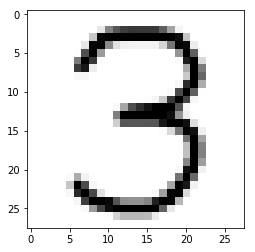

In [5]:
# Netz testen am eigenen Bild

# Bilddaten von *.png in Array laden
#Test-Datei einlesen und ausgeben, 'r'=readonly (datei noch ändern!!!)
print ("loading ... my_own_images/2828_my_own_image.png")
#img_array = imageio.imread('2828_my_own_5.png', as_gray=True)
#img_array = imageio.imread('2828_my_own_4.png', as_gray=True)
img_array = imageio.imread('2828_my_own_image.png', as_gray=True)
    
# von 28x28_Array in eine Liste mit 784 Werten
# Werte umkehren (aus schwarz/weiß ein weiß/schwarz-bild)
img_data  = 255.0 - img_array.reshape(784)
    
# Skalieren in einen Werteberiech von 0.01 bis 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))

# Bild drucken
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# Netzwerkabfrage
outputs = n.query(img_data)
print (outputs)

# der Index mit dem höchsten Wert entspricht der Klasse(Zahl)
label = numpy.argmax(outputs)
print("Netzwerk sagt ", label)